# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sb #Graphical package
from pylab import *
from matplotlib.font_manager import FontProperties
import os


# Local modules
import dataproject



# Read and clean data

## Employment data

**Read the employment data** in ``RAS200.xlsx`` and **clean it** removing and renaming columns:

In [45]:
wage = pd.read_excel('DST wage.xlsx', skiprows=2) #load data
wage.head() # look at data
drop_these = ['Unnamed: ' + str(num) for num in range (4)]
wage.drop(drop_these, axis=1, inplace=True)
wage.rename(columns = {'Unnamed: 4' : 'Region'}, inplace=True)#change name in first column
wage.head(1000)



,Region,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Region Hovedstaden,23687,22598,23582,24737,25021,25514,26492,27012,27197,...,21770,21294,20786,20828,20790,20940,21493,22322,23183,23696
1,Landsdel Byen København,24572,23756,25208,26219,26517,26641,27629,27786,27817,...,21845,21156,20484,20779,20814,20865,20686,21554,22024,22658
2,Landsdel Københavns omegn,23849,22637,23288,24545,24718,25254,26228,27396,27692,...,21705,21323,20950,20809,20188,20288,21421,22093,23020,23468
3,Landsdel Nordsjælland,22796,21666,22400,23610,24122,24954,26104,26227,26436,...,21413,20947,20474,20473,20794,21077,21649,22549,23711,24192
4,Landsdel Bornholm,23330,21485,24055,24744,23824,23836,23327,23652,23734,...,25769,26378,25801,26101,28579,29253,31359,33617,35205,36054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Region Midtjylland,1751,1795,2335,2558,2849,2925,3217,3216,2995,...,4490,5335,6368,7552,7613,9440,9249,10505,12702,12394
204,Landsdel Østjylland,1745,1829,2453,2504,2783,2689,3219,3265,2887,...,4526,5737,6577,8043,8442,10558,10067,11427,13139,13429
205,Landsdel Vestjylland,1760,1738,2129,2651,2964,3338,3212,3131,3186,...,4429,4653,6013,6713,6195,7531,7855,8941,11958,10614
206,Region Nordjylland,1205,1273,1868,2032,2433,2511,2570,2142,2649,...,2963,4120,4295,5390,5769,6469,7132,8928,7747,9894


The dataset now looks like this:

In [46]:
#Rename years
col_dict = {}
for i in range(1992, 2019+1): # range goes from 1992 to but not including 2020
    col_dict[str(i)] = f'e{i}' 
col_dict
wage.rename(columns = col_dict, inplace=True)
#Build up a logical index I
I = wage.Region.str.contains('Landsdel')
wage.loc[I, :]

,Region,e1992,e1993,e1994,e1995,e1996,e1997,e1998,e1999,e2000,...,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017,e2018,e2019
1,Landsdel Byen København,24572,23756,25208,26219,26517,26641,27629,27786,27817,...,21845,21156,20484,20779,20814,20865,20686,21554,22024,22658
2,Landsdel Københavns omegn,23849,22637,23288,24545,24718,25254,26228,27396,27692,...,21705,21323,20950,20809,20188,20288,21421,22093,23020,23468
3,Landsdel Nordsjælland,22796,21666,22400,23610,24122,24954,26104,26227,26436,...,21413,20947,20474,20473,20794,21077,21649,22549,23711,24192
4,Landsdel Bornholm,23330,21485,24055,24744,23824,23836,23327,23652,23734,...,25769,26378,25801,26101,28579,29253,31359,33617,35205,36054
6,Landsdel Østsjælland,24223,23029,24241,25048,25486,25918,26947,26721,27071,...,22541,21388,21040,20907,21318,21450,21809,23132,24430,24323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Landsdel Fyn,1887,1904,2543,2422,2807,2869,2795,2561,2541,...,3657,4026,4084,6398,5005,5733,5720,7914,7226,10672
202,Landsdel Sydjylland,1906,1663,2408,2434,2905,2954,3038,2924,3338,...,3358,4635,5139,5707,5786,5908,5994,8105,8369,9472
204,Landsdel Østjylland,1745,1829,2453,2504,2783,2689,3219,3265,2887,...,4526,5737,6577,8043,8442,10558,10067,11427,13139,13429
205,Landsdel Vestjylland,1760,1738,2129,2651,2964,3338,3212,3131,3186,...,4429,4653,6013,6713,6195,7531,7855,8941,11958,10614


**Remove all rows which are not municipalities**:

In [47]:
wage = wage.loc[I == False] # keep everything else
wage.head(10)



,Region,e1992,e1993,e1994,e1995,e1996,e1997,e1998,e1999,e2000,...,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017,e2018,e2019
0,Region Hovedstaden,23687,22598,23582,24737,25021,25514,26492,27012,27197,...,21770,21294,20786,20828,20790,20940,21493,22322,23183,23696
5,Region Sjælland,23257,22071,23031,23918,24249,24849,25424,25383,25537,...,22862,22588,21750,21734,22022,22283,22506,23745,25497,26142
8,Region Syddanmark,24296,23025,24617,26357,26015,26504,27260,26930,27096,...,25284,24759,23539,23543,23786,23704,24361,25200,27351,28394
11,Region Midtjylland,24563,23554,24865,26190,25877,26406,26729,26589,26635,...,24483,24059,23114,22865,23232,23394,24050,25332,26409,26987
14,Region Nordjylland,24161,23023,24239,25639,25585,26476,27340,26573,26152,...,25798,25736,24546,24384,24645,24927,25294,26624,28398,29148
16,Region Hovedstaden,83191,79425,83013,88858,91680,95165,99171,102325,104543,...,103008,98725,95693,94311,95006,98420,102466,105417,110673,113380
21,Region Sjælland,93431,90462,94567,100987,102974,106611,109860,112632,115299,...,116165,110734,106321,103199,103154,107356,112388,117202,123914,127878
24,Region Syddanmark,86796,84357,89916,96741,98599,102293,105881,106832,108783,...,112558,106496,102582,99530,101008,102501,103696,108994,116271,119899
27,Region Midtjylland,84702,81004,87362,93877,95311,98900,102367,103938,105050,...,105842,101007,96112,94703,96316,98685,101736,106193,112243,115292
30,Region Nordjylland,82865,79950,86968,93321,96287,100921,103321,103645,103396,...,108668,103679,100394,96738,95698,97025,101203,104161,110649,113277


In [48]:
wage = wage.reset_index()
del wage['index']#reset index
wage.head(10)


age=['15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','74+']#add age as rows
age_group=list(np.repeat(age,5))
wage['Age_group'] = age_group
wage.head(100)

,Region,e1992,e1993,e1994,e1995,e1996,e1997,e1998,e1999,e2000,...,e2011,e2012,e2013,e2014,e2015,e2016,e2017,e2018,e2019,Age_group
0,Region Hovedstaden,23687,22598,23582,24737,25021,25514,26492,27012,27197,...,21294,20786,20828,20790,20940,21493,22322,23183,23696,15-19
1,Region Sjælland,23257,22071,23031,23918,24249,24849,25424,25383,25537,...,22588,21750,21734,22022,22283,22506,23745,25497,26142,15-19
2,Region Syddanmark,24296,23025,24617,26357,26015,26504,27260,26930,27096,...,24759,23539,23543,23786,23704,24361,25200,27351,28394,15-19
3,Region Midtjylland,24563,23554,24865,26190,25877,26406,26729,26589,26635,...,24059,23114,22865,23232,23394,24050,25332,26409,26987,15-19
4,Region Nordjylland,24161,23023,24239,25639,25585,26476,27340,26573,26152,...,25736,24546,24384,24645,24927,25294,26624,28398,29148,15-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Region Hovedstaden,2555,2768,3368,3207,3485,3963,3648,3571,3572,...,5503,6587,7646,7989,8908,12224,12897,13734,16265,74+
61,Region Sjælland,2051,1920,2339,2698,2839,3023,3061,3342,2911,...,3687,4716,5903,6589,6122,7550,8196,8019,9476,74+
62,Region Syddanmark,1898,1769,2467,2429,2862,2917,2933,2768,2996,...,4383,4703,5992,5466,5836,5883,8028,7904,9960,74+
63,Region Midtjylland,1751,1795,2335,2558,2849,2925,3217,3216,2995,...,5335,6368,7552,7613,9440,9249,10505,12702,12394,74+


**Convert the dataset to long format**:

,municipality,year,employment
0,Copenhagen,2008,72.5
1,Frederiksberg,2008,75.6
2,Dragør,2008,80.5
3,Tårnby,2008,79.0
4,Albertslund,2008,73.1


## Income data

**Read the income data** in ``INDKP101.xlsx`` and **clean it**:

,municipality,year,income
0,Copenhagen,1987,75356
1,Frederiksberg,1987,85428
2,Dragør,1987,97966
3,Tårnby,1987,87598
4,Albertslund,1987,83540


> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

The **interactive plot** is:

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

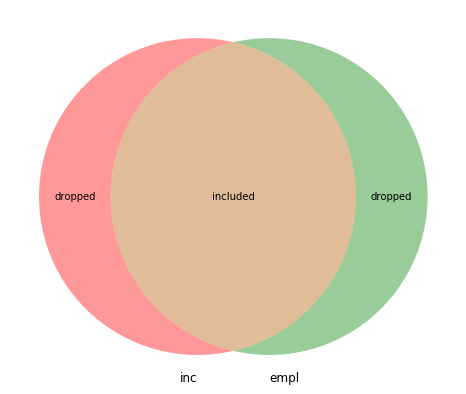

Number of municipalities = 98
Number of years          = 10


# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.